In [6]:
import matplotlib.pyplot as plt
import numpy as np

def pad_accuracies(accuracies):
    max_len = max(len(task) for task in accuracies)
    padded_accuracies = [task + [None] * (max_len - len(task)) for task in accuracies]
    return np.array(padded_accuracies, dtype=np.float32)

def plot_task_accuracies_roundwise(sgd_accuracies, bgd_accuracies):
 
    sgd_accuracies = pad_accuracies(sgd_accuracies)
    bgd_accuracies = pad_accuracies(bgd_accuracies)
    
    plt.figure(figsize=(10, 6))

    colors = plt.cm.Set1(np.linspace(0, 1, sgd_accuracies.shape[1]))
    for i in range(0, sgd_accuracies.shape[1], 2): # 0 - 9
        # print(f'sgd_accuracies : {sgd_accuracies[:, i]}')
        task_accuracies_over_rounds = sgd_accuracies[:, i]
        # print(task_accuracies_over_rounds)
        plt.plot(range(1, sgd_accuracies.shape[0] + 1), task_accuracies_over_rounds, marker='o', linestyle='--', color=colors[i], label=f'SGD Task {i+1}')

   
    for i in range(0, bgd_accuracies.shape[1], 2):
        #print(f'bgd_accuracies : {bgd_accuracies[:, i]}')
        plt.plot(range(1, bgd_accuracies.shape[0] + 1), bgd_accuracies[:, i], marker='s', color=colors[i], label=f'BGD Task {i+1}')
    
    plt.title(f'Task Accuracies Round-wise for SGD and BGD with FedAvg BGD')
    plt.xlabel('Rounds')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:

def plot_average_accuracies_over_rounds(sgd_accuracies, bgd_accuracies):
    plt.figure(figsize=(10, 6))
    tasks = range(0, len(sgd_accuracies))
    
    sgd_means = [np.mean(np.array(task_accs)) for task_accs in sgd_accuracies]
    print(f"sgd_means: {sgd_means}")
    plt.plot(tasks, sgd_means, marker='o', label='SGD')
    
    bgd_means = [np.mean(np.array(task_accs)) for task_accs in bgd_accuracies]
    print(f"bgd_means: {bgd_means}")
    plt.plot(tasks, bgd_means, marker='s', label='BGD')
    
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title(f'Average Accuracies per round for SGD and BGD - FedAvg BGD ')
    plt.xticks(range(max(len(sgd_accuracies), len(bgd_accuracies))), [f'{i+1}' for i in range(max(len(sgd_accuracies), len(bgd_accuracies)))])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [8]:
def calculate_forgetting(sgd_task_accuracies, bgd_task_accuracies):
    s = len(sgd_task_accuracies)

    print("sgd_avg_acc_after_last_task", round(np.mean(sgd_task_accuracies[s-1]), 2))
    print("bgd_avg_acc_after_last_task", round(np.mean(bgd_task_accuracies[s-1]), 2))

    sgd_forgetting = []
    for i in range(s-1):
        sgd_forgetting.append(sgd_task_accuracies[i][i]-sgd_task_accuracies[s-1][i])

    bgd_forgetting = []
    for i in range(s-1):
        bgd_forgetting.append(bgd_task_accuracies[i][i]-bgd_task_accuracies[s-1][i])

    return round(np.mean(sgd_forgetting),2), round(np.mean(bgd_forgetting), 2)

#### With new aggregation -- Permuted MNIST

#### IID || Rounds-10 || Tasks-10

In [7]:
new_agg_rounds_10_bgd_sgd = {'bgd' : [[95.64], [91.47, 96.6], [83.28, 93.59, 96.76], [61.13, 79.18, 89.58, 96.96], [49.74, 66.17, 81.51, 91.3, 96.72], [39.63, 61.24, 63.66, 82.75, 93.22, 96.19], [31.89, 42.76, 48.92, 75.07, 84.23, 92.97, 96.49], [20.79, 32.62, 37.35, 66.61, 65.87, 84.96, 91.57, 96.46], [18.14, 26.05, 31.11, 51.35, 49.64, 65.47, 80.43, 92.21, 95.97], [17.71, 24.64, 28.07, 47.64, 46.72, 55.33, 73.65, 86.33, 94.53, 96.17]],
                     'sgd' : [[96.5], [91.88, 97.26], [79.09, 95.29, 97.33], [51.21, 75.7, 93.13, 97.36], [46.66, 57.43, 76.43, 93.95, 97.44], [26.18, 39.02, 45.83, 72.15, 93.17, 97.47], [15.17, 22.65, 32.05, 50.97, 78.26, 93.98, 97.55], [11.07, 11.36, 21.68, 28.98, 39.65, 81.96, 95.09, 97.63], [10.48, 12.76, 15.71, 20.2, 22.09, 54.78, 76.55, 94.4, 97.55], [10.0, 12.77, 13.73, 16.09, 15.64, 38.89, 58.22, 87.97, 96.14, 97.57]]}

sgd_means: [96.5, 94.57, 90.57, 79.35, 74.382, 62.30333333333334, 55.80428571428572, 48.427499999999995, 44.946666666666665, 44.702]
bgd_means: [95.64, 94.035, 91.21, 81.71249999999999, 77.08800000000001, 72.78166666666667, 67.47571428571429, 62.028749999999995, 56.70777777777778, 57.07899999999999]


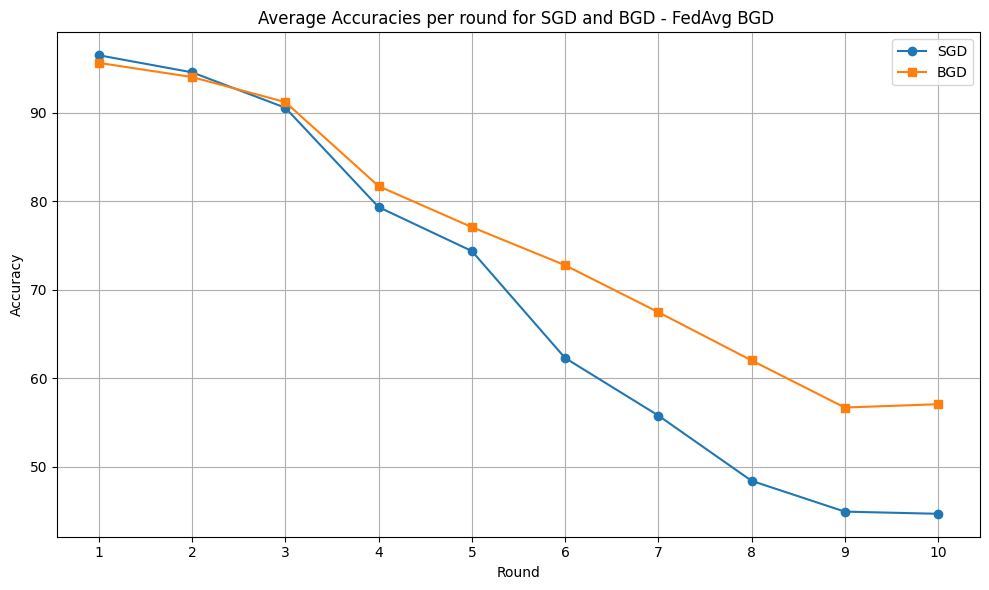

In [8]:
plot_average_accuracies_over_rounds(new_agg_rounds_10_bgd_sgd['sgd'], new_agg_rounds_10_bgd_sgd['bgd'])

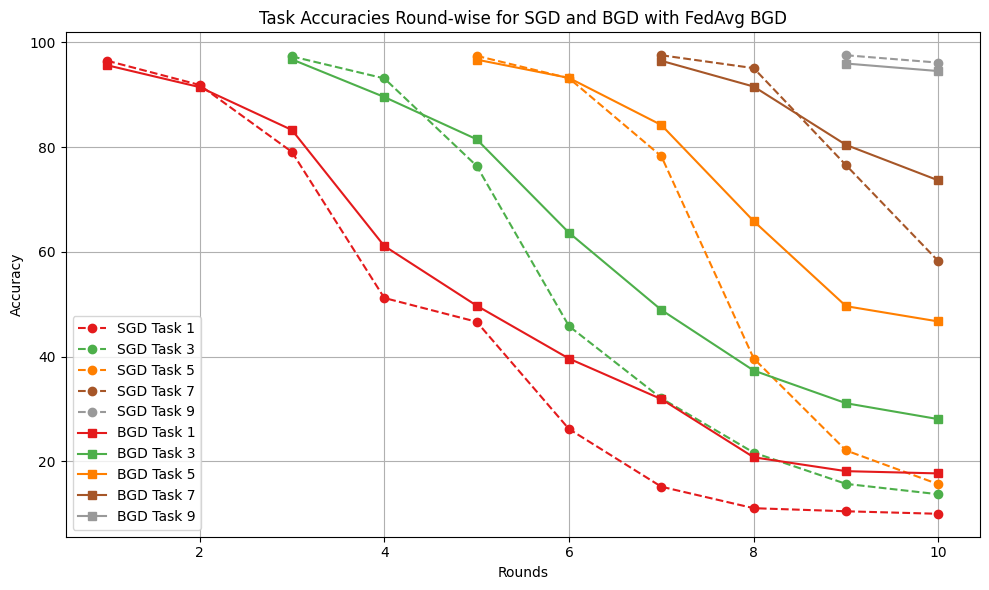

In [9]:
plot_task_accuracies_roundwise(new_agg_rounds_10_bgd_sgd['sgd'], new_agg_rounds_10_bgd_sgd['bgd'])

In [10]:
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_rounds_10_bgd_sgd['sgd'], new_agg_rounds_10_bgd_sgd['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  

sgd_avg_acc_after_last_task 44.7
bgd_avg_acc_after_last_task 57.08


(58.52, 43.69)

#### Non-IID || Rounds-10 || Tasks-10

In [11]:
new_agg_rounds_10_bgd_sgd_non_iid = {'bgd' : [[42.54], [24.58, 47.04], [24.88, 38.44, 50.33], [21.22, 34.71, 41.96, 48.23], [15.74, 25.82, 41.81, 37.8, 55.89], [13.8, 27.06, 36.04, 38.49, 48.8, 56.15], [15.59, 22.99, 30.34, 37.25, 43.75, 42.02, 49.49], [14.54, 20.18, 28.28, 33.36, 34.53, 34.19, 44.16, 53.15], [11.06, 19.76, 26.28, 27.26, 29.93, 29.17, 38.42, 42.21, 50.11], [9.35, 17.67, 23.13, 22.74, 25.32, 25.82, 31.52, 37.55, 46.25, 50.7]],
                                     'sgd' : [[34.46], [28.43, 51.89], [28.07, 40.77, 50.2], [34.85, 46.44, 54.4, 59.44], [18.47, 34.74, 32.96, 44.81, 52.15], [18.37, 28.46, 34.61, 46.75, 49.33, 53.12], [12.63, 25.12, 23.38, 34.98, 42.29, 42.48, 50.28], [18.64, 18.87, 21.84, 35.88, 39.72, 40.07, 53.64, 57.25], [17.85, 13.12, 17.52, 25.03, 21.99, 25.81, 33.48, 46.94, 49.61], [16.13, 15.45, 22.26, 30.86, 23.61, 37.35, 40.54, 56.96, 59.81, 60.33]]}

sgd_means: [34.46, 40.16, 39.68, 48.7825, 36.626000000000005, 38.44, 33.02285714285714, 35.73875, 27.927777777777774, 36.33]
bgd_means: [42.54, 35.81, 37.88333333333333, 36.53, 35.412, 36.723333333333336, 34.49, 32.79875, 30.466666666666665, 29.005000000000003]


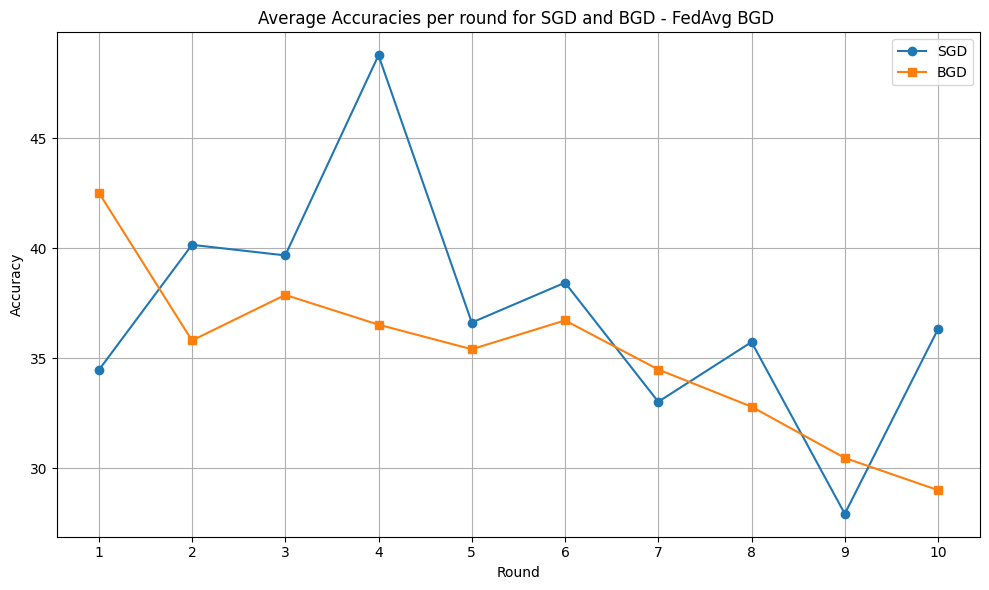

In [12]:
plot_average_accuracies_over_rounds(new_agg_rounds_10_bgd_sgd_non_iid['sgd'], new_agg_rounds_10_bgd_sgd_non_iid['bgd'])

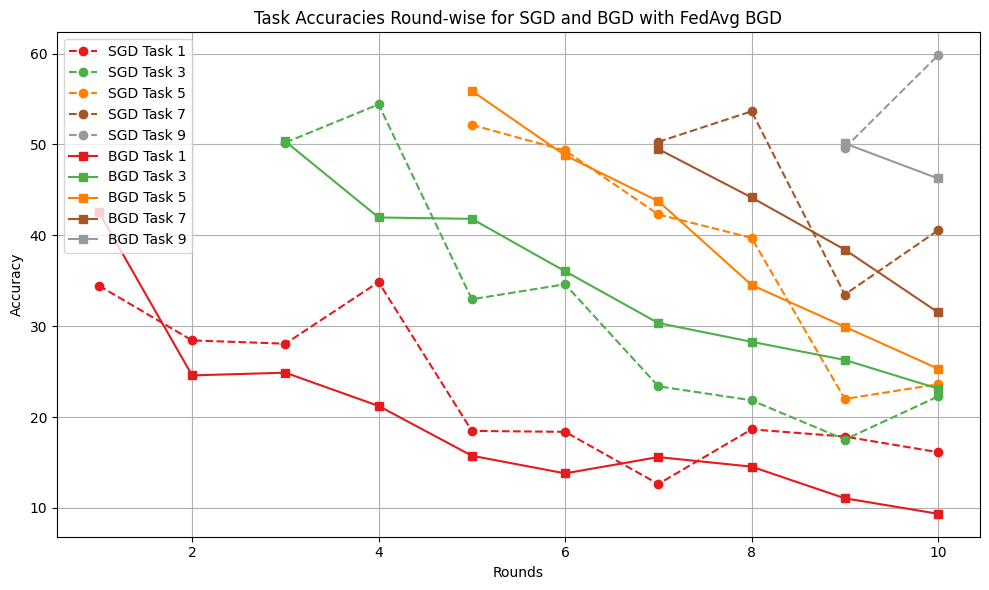

In [13]:
plot_task_accuracies_roundwise(new_agg_rounds_10_bgd_sgd_non_iid['sgd'], new_agg_rounds_10_bgd_sgd_non_iid['bgd'])

In [14]:
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_rounds_10_bgd_sgd_non_iid['sgd'], new_agg_rounds_10_bgd_sgd_non_iid['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  

sgd_avg_acc_after_last_task 36.33
bgd_avg_acc_after_last_task 29.01


(17.27, 23.73)

sgd_means: [34.46, 40.16, 39.68, 48.7825, 36.626000000000005, 38.44, 33.02285714285714, 35.73875, 27.927777777777774, 36.33]
bgd_means: [42.54, 35.81, 37.88333333333333, 36.53, 35.412, 36.723333333333336, 34.49, 32.79875, 30.466666666666665, 29.005000000000003]


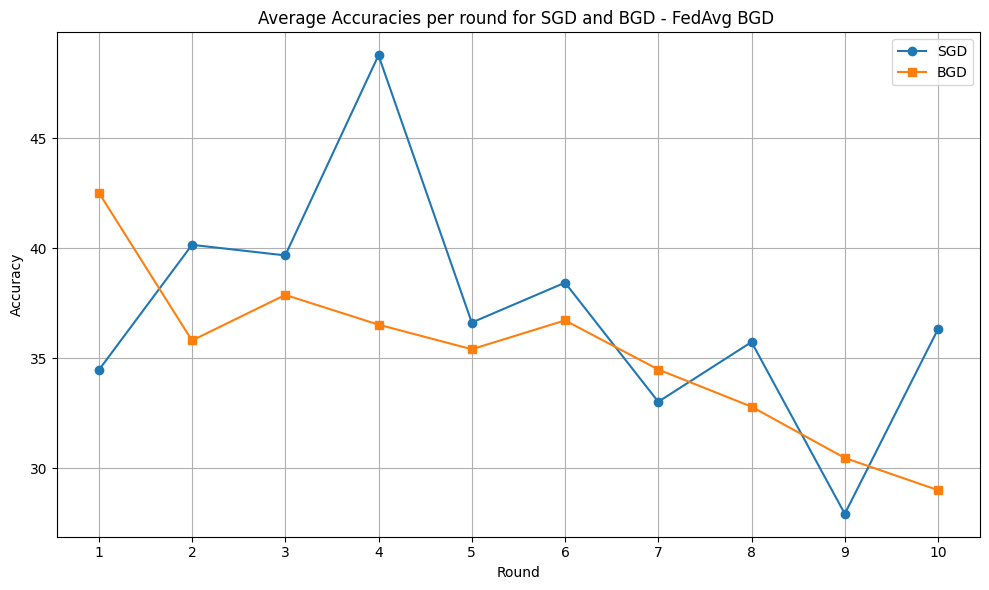

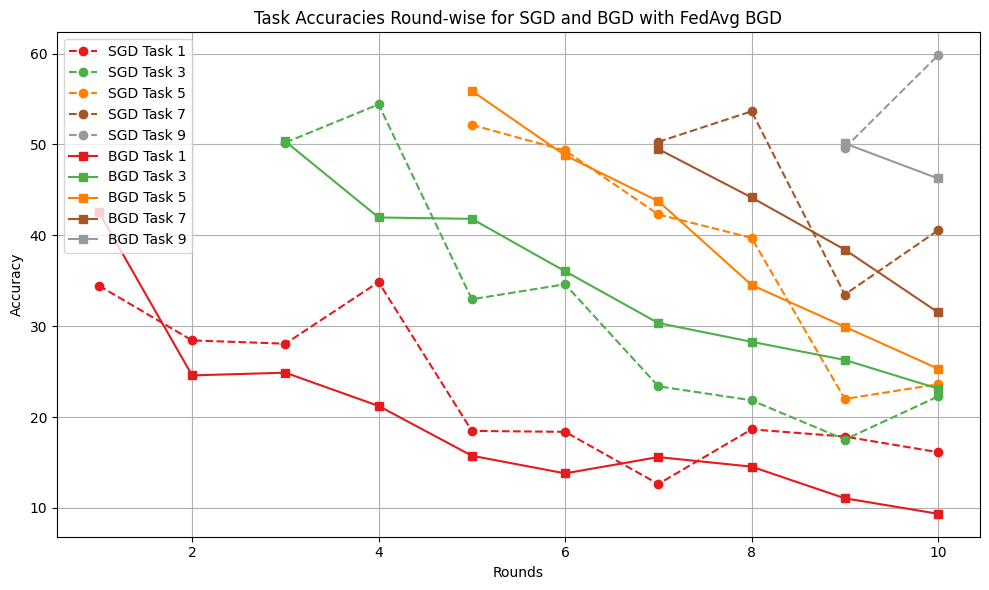

sgd_avg_acc_after_last_task 36.33
bgd_avg_acc_after_last_task 29.01


(17.27, 23.73)

In [15]:
#### Non-IID || Rounds-10 || Tasks-10
new_agg_rounds_10_bgd_sgd_non_iid = {'bgd' : [[42.54], [24.58, 47.04], [24.88, 38.44, 50.33], [21.22, 34.71, 41.96, 48.23], [15.74, 25.82, 41.81, 37.8, 55.89], [13.8, 27.06, 36.04, 38.49, 48.8, 56.15], [15.59, 22.99, 30.34, 37.25, 43.75, 42.02, 49.49], [14.54, 20.18, 28.28, 33.36, 34.53, 34.19, 44.16, 53.15], [11.06, 19.76, 26.28, 27.26, 29.93, 29.17, 38.42, 42.21, 50.11], [9.35, 17.67, 23.13, 22.74, 25.32, 25.82, 31.52, 37.55, 46.25, 50.7]],
                                     'sgd' : [[34.46], [28.43, 51.89], [28.07, 40.77, 50.2], [34.85, 46.44, 54.4, 59.44], [18.47, 34.74, 32.96, 44.81, 52.15], [18.37, 28.46, 34.61, 46.75, 49.33, 53.12], [12.63, 25.12, 23.38, 34.98, 42.29, 42.48, 50.28], [18.64, 18.87, 21.84, 35.88, 39.72, 40.07, 53.64, 57.25], [17.85, 13.12, 17.52, 25.03, 21.99, 25.81, 33.48, 46.94, 49.61], [16.13, 15.45, 22.26, 30.86, 23.61, 37.35, 40.54, 56.96, 59.81, 60.33]]}
plot_average_accuracies_over_rounds(new_agg_rounds_10_bgd_sgd_non_iid['sgd'], new_agg_rounds_10_bgd_sgd_non_iid['bgd'])
plot_task_accuracies_roundwise(new_agg_rounds_10_bgd_sgd_non_iid['sgd'], new_agg_rounds_10_bgd_sgd_non_iid['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_rounds_10_bgd_sgd_non_iid['sgd'], new_agg_rounds_10_bgd_sgd_non_iid['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  

#### IID || Rounds-5 || Tasks-5

In [16]:
new_agg_tasks_5_bgd_sgd_iid = {'bgd' : [[96.26], [89.85, 96.84], [82.86, 94.1, 96.7], [65.61, 87.04, 93.3, 96.6], [56.6, 80.46, 88.4, 95.43, 96.7]],
                                     'sgd' : [[96.5], [92.21, 97.27], [80.3, 95.06, 97.35], [51.38, 75.29, 93.14, 97.4], [41.05, 59.52, 85.07, 96.73, 97.44]]}

sgd_means: [96.5, 94.74, 90.90333333333335, 79.30250000000001, 75.962]
bgd_means: [96.26, 93.345, 91.21999999999998, 85.63749999999999, 83.518]


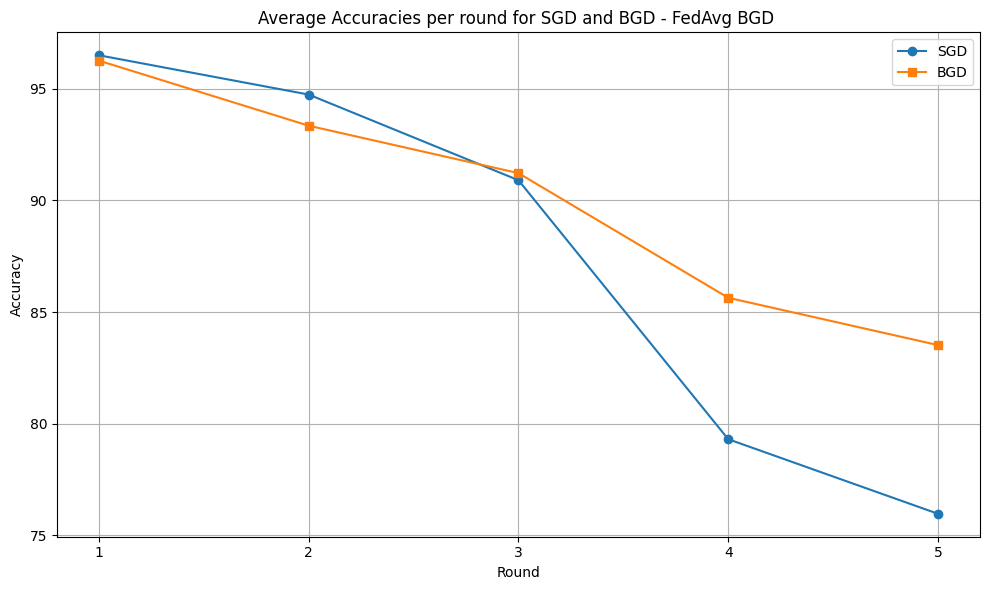

In [17]:
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid['sgd'], new_agg_tasks_5_bgd_sgd_iid['bgd'])

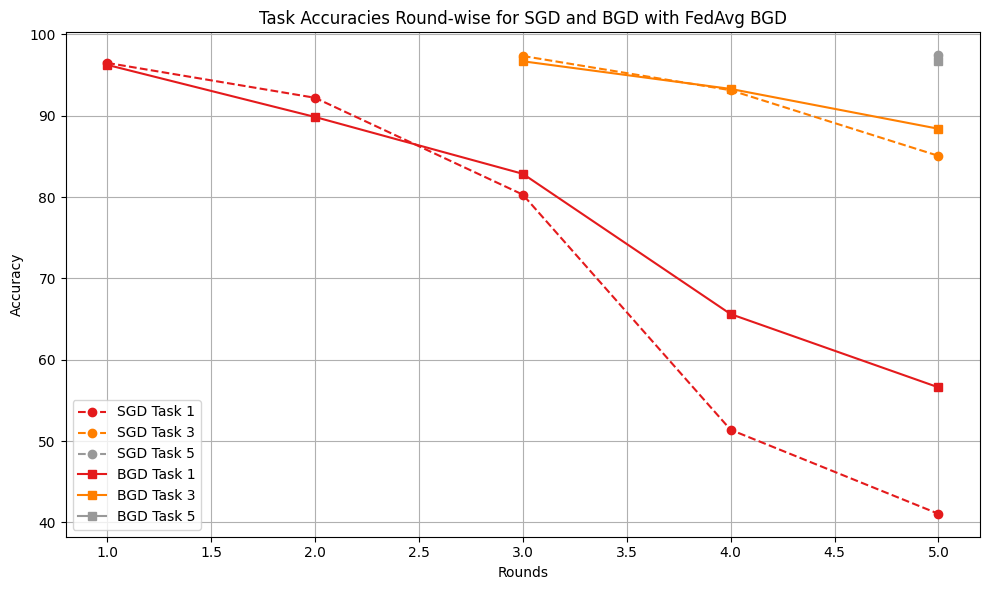

In [18]:
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid['sgd'], new_agg_tasks_5_bgd_sgd_iid['bgd'])

In [19]:
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid['sgd'], new_agg_tasks_5_bgd_sgd_iid['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  

sgd_avg_acc_after_last_task 75.96
bgd_avg_acc_after_last_task 83.52


(26.54, 16.38)

#### Non-IID || Rounds-5 || Tasks-5

In [20]:
new_agg_tasks_5_bgd_sgd_non_iid = {'bgd' : [[36.47], [29.73, 48.2], [23.01, 44.19, 48.2], [21.13, 37.68, 45.98, 49.54], [20.22, 34.61, 40.12, 46.39, 47.04]],
                                   'sgd' : [[34.5], [27.91, 51.57], [27.09, 40.14, 49.72], [34.18, 46.18, 54.12, 59.54], [20.16, 37.78, 41.14, 47.1, 53.56]]}

In [ ]:
# with max_gradnorm_6 = [[17.83], [19.93, 38.4], [12.63, 33.62, 43.56], [14.8, 22.51, 32.76, 28.43], [15.29, 23.9, 29.68, 30.3, 43.95]]
# with max_gradnorm_1 = [[36.47], [29.73, 48.2], [23.01, 44.19, 48.2], [21.13, 37.68, 45.98, 49.54], [20.22, 34.61, 40.12, 46.39, 47.04]]

sgd_means: [34.5, 39.74, 38.983333333333334, 48.504999999999995, 39.948]
bgd_means: [36.47, 38.965, 38.46666666666667, 38.582499999999996, 37.675999999999995]


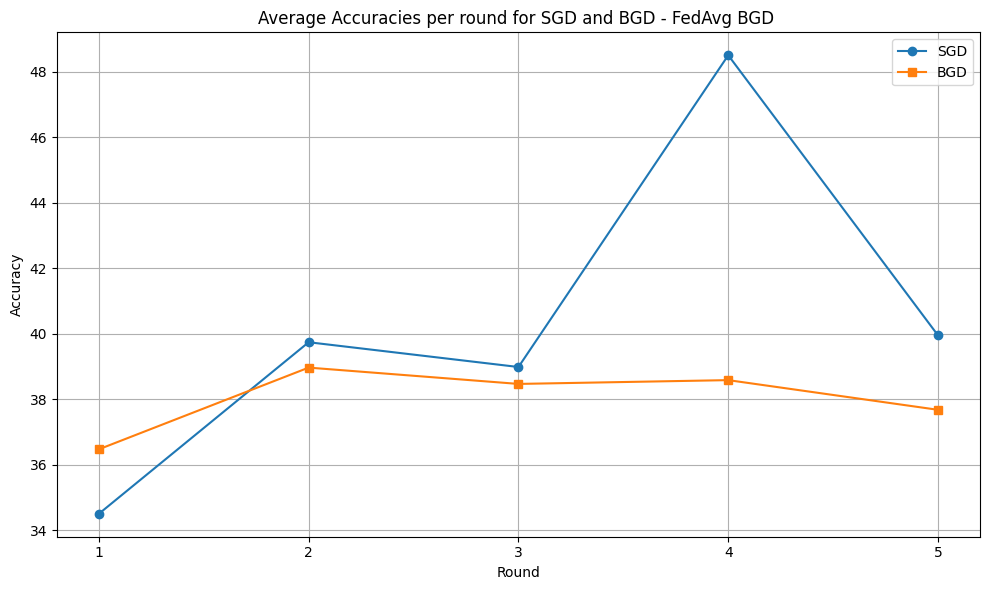

In [21]:
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_non_iid['sgd'], new_agg_tasks_5_bgd_sgd_non_iid['bgd'])

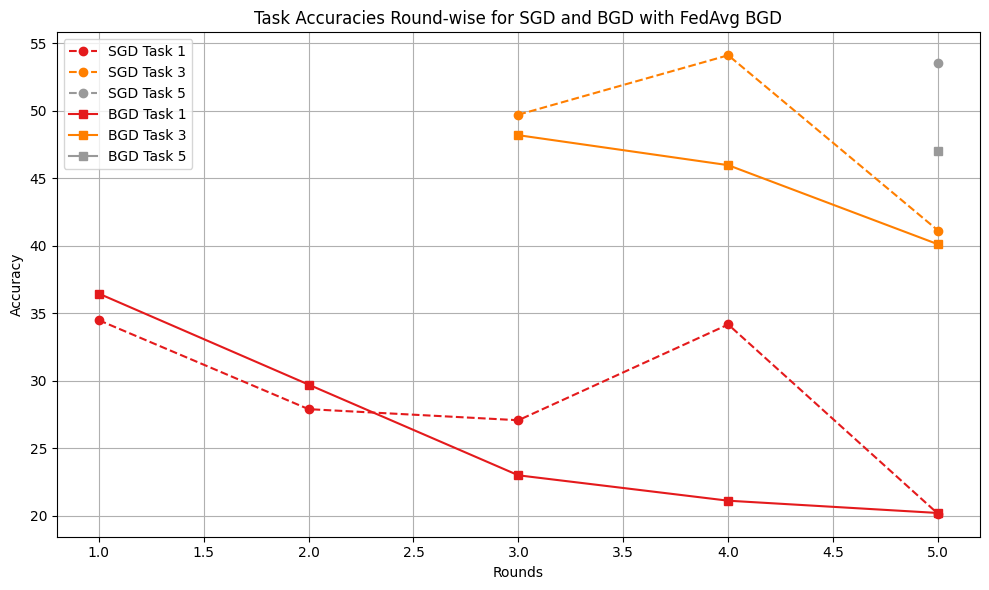

In [22]:
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_non_iid['sgd'], new_agg_tasks_5_bgd_sgd_non_iid['bgd'])

In [23]:
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_non_iid['sgd'], new_agg_tasks_5_bgd_sgd_non_iid['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  

sgd_avg_acc_after_last_task 39.95
bgd_avg_acc_after_last_task 37.68


(12.29, 10.27)

## **Split MNIST Experiments in IID and Non-IID Cases**

## **IID**

sgd_means: [99.622, 97.4555, 90.33533333333332, 63.371750000000006, 65.487]
bgd_means: [99.669, 98.56700000000001, 90.09866666666666, 67.3425, 72.346]


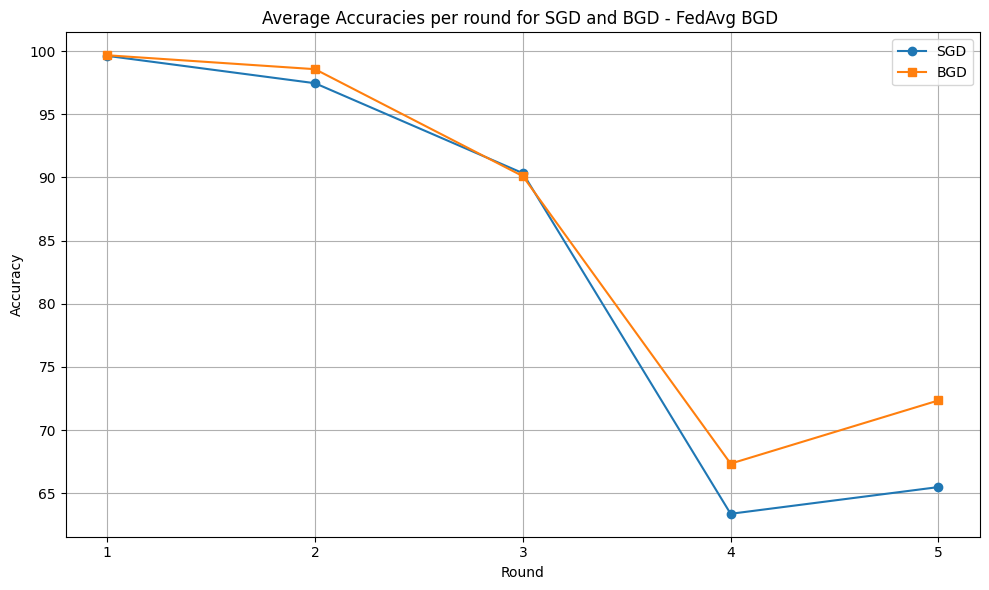

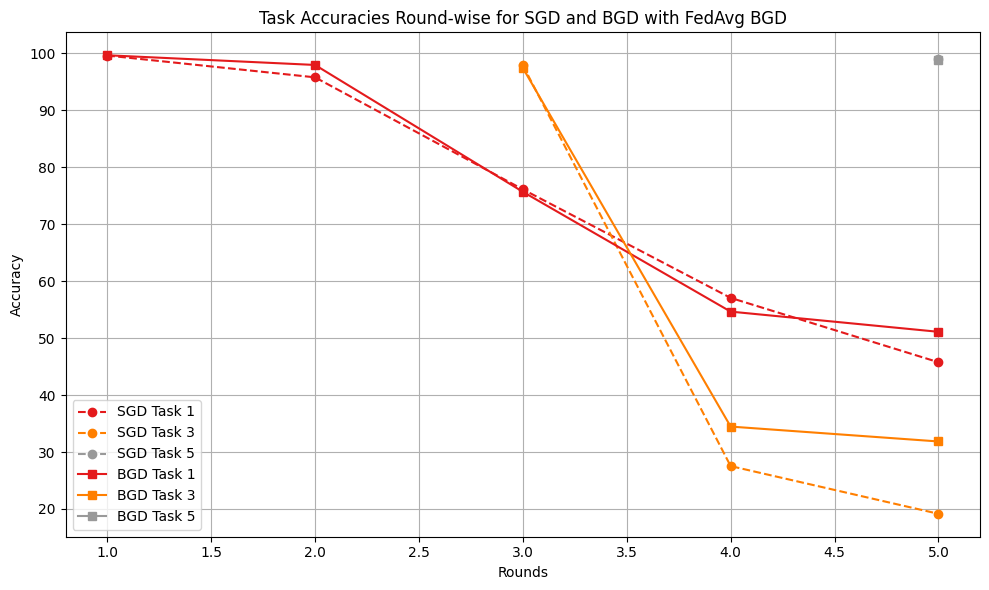

sgd_avg_acc_after_last_task 65.49
bgd_avg_acc_after_last_task 72.35


(41.87, 33.15)

In [9]:
new_agg_tasks_5_bgd_sgd_iid_split_mnist = {'bgd' : [[99.669], [97.967, 99.167], [75.697, 97.16, 97.439], [54.657, 81.097, 34.472, 99.144], [51.111, 81.734, 31.857, 98.137, 98.891]],
                               'sgd' : [[99.622], [95.792, 99.119], [76.123, 96.964, 97.919], [57.069, 69.638, 27.535, 99.245], [45.768, 65.181, 19.157, 98.338, 98.991]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_iid_split_mnist['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_iid_split_mnist['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_iid_split_mnist['sgd'], new_agg_tasks_5_bgd_sgd_iid_split_mnist['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  


sgd_means: [98.392, 93.0555, 90.14266666666667, 62.360749999999996, 64.6032]
bgd_means: [98.723, 95.872, 91.10633333333332, 66.52775, 71.5634]


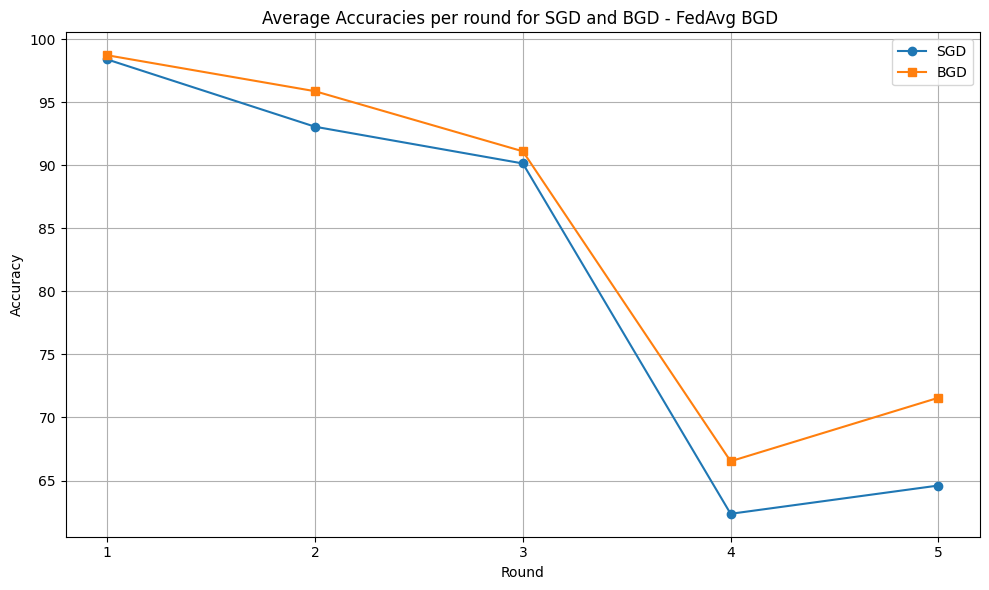

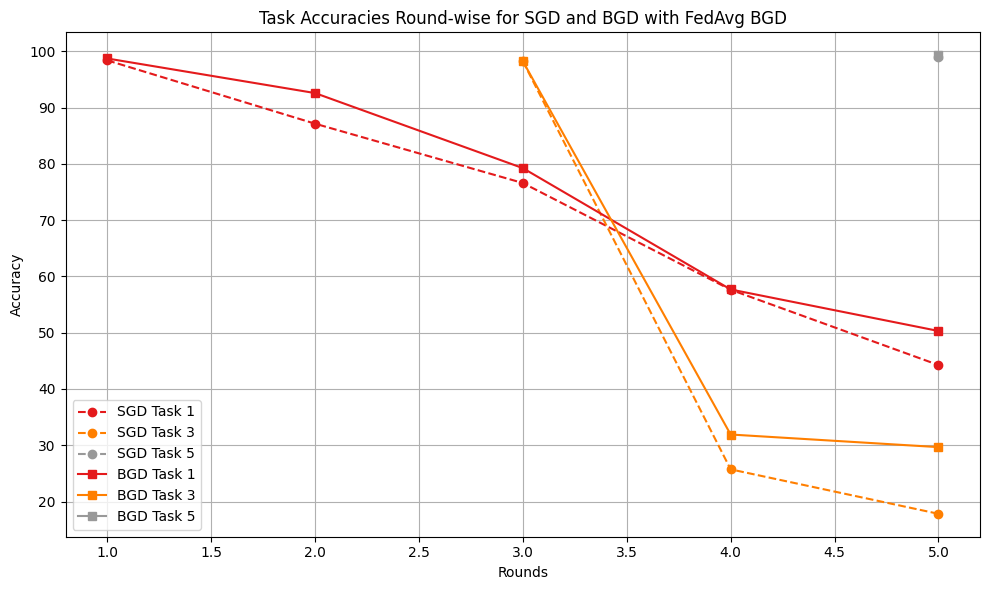

sgd_avg_acc_after_last_task 64.6
bgd_avg_acc_after_last_task 71.56


(42.67, 34.17)

In [10]:
#### Non-IID || Rounds-5 || Tasks-5
new_agg_tasks_5_bgd_sgd_non_iid_split_mnist = {'bgd' : [[98.723], [92.577, 99.167], [79.243, 95.837, 98.239], [57.683, 77.424, 31.91, 99.094], [50.307, 80.46, 29.669, 98.087, 99.294]],
                                               'sgd' : [[98.392], [87.139, 98.972], [76.596, 95.593, 98.239], [57.636, 66.993, 25.72, 99.094], [44.255, 63.81, 17.823, 98.137, 98.991]]}
plot_average_accuracies_over_rounds(new_agg_tasks_5_bgd_sgd_non_iid_split_mnist['sgd'], new_agg_tasks_5_bgd_sgd_non_iid_split_mnist['bgd'])
plot_task_accuracies_roundwise(new_agg_tasks_5_bgd_sgd_non_iid_split_mnist['sgd'], new_agg_tasks_5_bgd_sgd_non_iid_split_mnist['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(new_agg_tasks_5_bgd_sgd_non_iid_split_mnist['sgd'], new_agg_tasks_5_bgd_sgd_non_iid_split_mnist['bgd'])
sgd_avg_forgetting, bgd_avg_forgetting  
   